Building the decision tree 

In [24]:
#import modeles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import plot_tree



In [13]:
#Importing the data
filepath=os.path.join("..","data","playgolf_data.csv")
df=pd.read_csv(filepath)
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [14]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object


Converting categorical variables into dummies/indicator variables

In [15]:
df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


create the model

In [16]:
#separte the features and depdentend data
x=df_getdummy.drop("PlayGolf",axis=1)
y=df_getdummy["PlayGolf"]
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)
x_test



,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
8,True,False,False,False,True,False,False,True,False,True
2,False,True,False,True,False,True,False,False,False,True
1,False,True,False,True,False,False,False,True,True,False
13,False,False,True,True,False,False,True,False,True,False
4,True,False,False,False,True,False,True,False,False,True
7,False,False,True,True,False,False,False,True,False,True
10,False,False,True,False,True,False,False,True,True,False
3,False,False,True,True,False,False,True,False,False,True
6,True,False,False,False,True,True,False,False,True,False


In [25]:
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
d_tree.fit(x_test,y_test)
predictions=d_tree.predict(x_test)
predictions

array(['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
      dtype=object)

Build the Decision_tree

[Text(0.6, 0.8333333333333334, 'Humidity_High <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = Play'),
 Text(0.4, 0.5, 'Outlook_Rainy <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = Not_play'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Play'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not_play'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Play'),
 Text(0.7, 0.6666666666666667, '  False')]

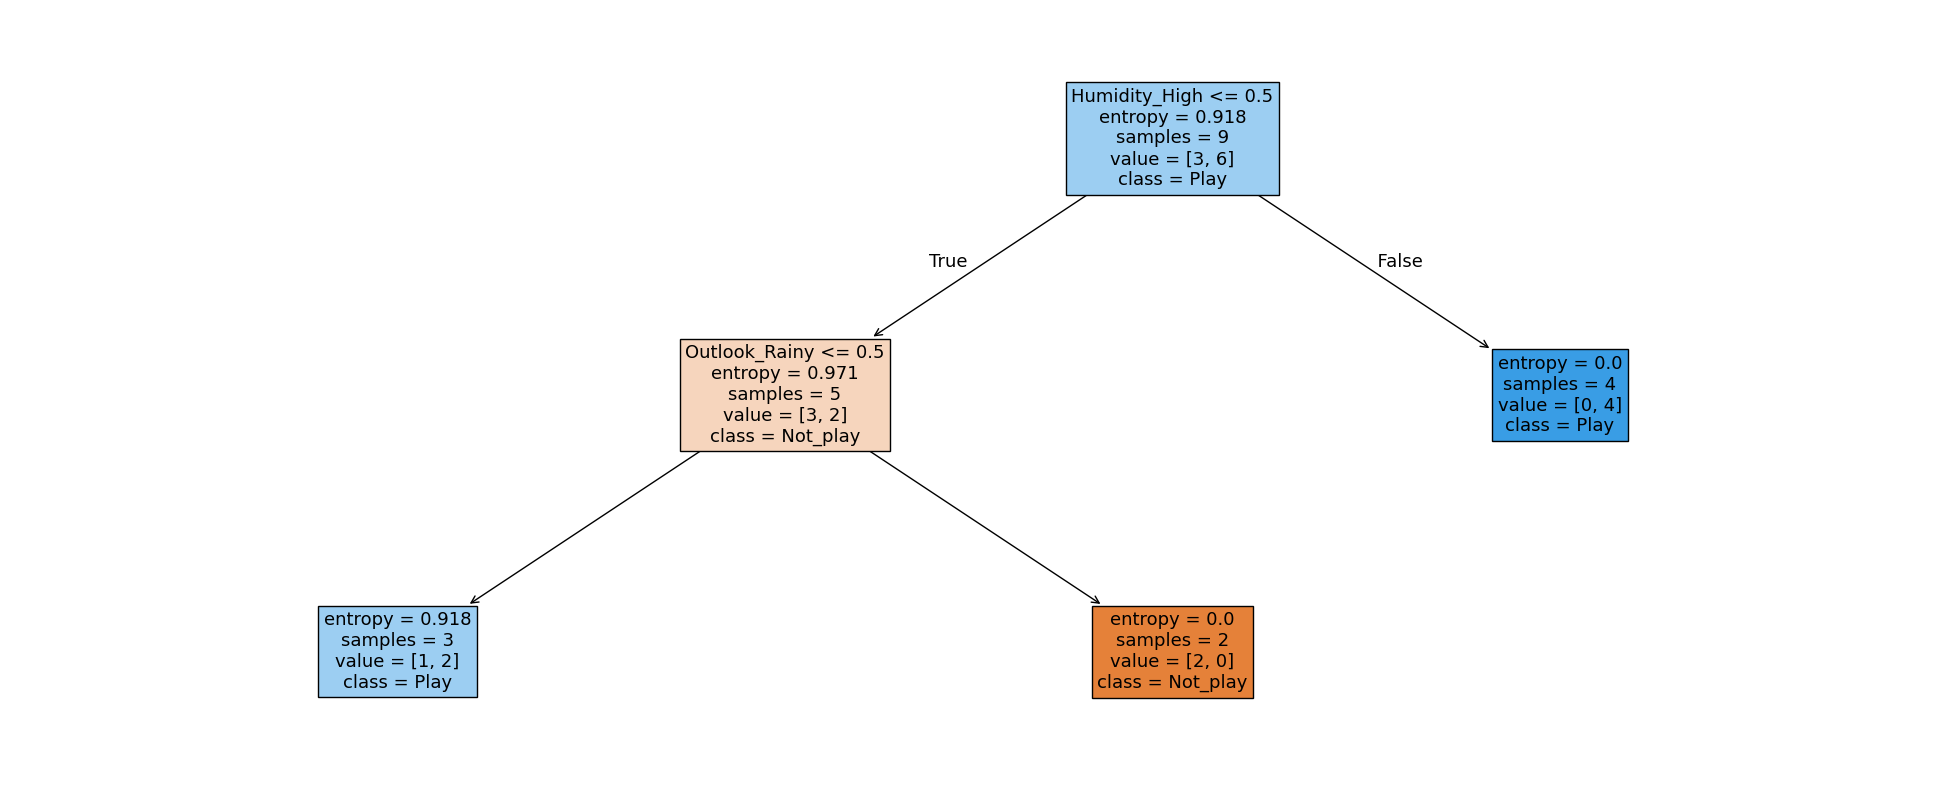

In [27]:
plt.figure(figsize=(25,10))
plot_tree(d_tree,feature_names=df_getdummy.columns,fontsize=13,filled=True,class_names=["Not_play","Play"])